<h1><center>Laboratorio 4: Spark y EDA</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>

### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Renato Pino
- Nombre de alumno 2: Valentina Abello


### **Link de repositorio de GitHub:** [Repositorio](https://github.com/Renato-98/MDS7202-1)

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 6 días de plazo con descuento de 1 punto por día. Entregas Jueves a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.

### Temas a tratar

- Introducción al manejo y análisis de grandes volúmenes de datos por medio de la libreria `pyspark`.

### Objetivos principales del laboratorio

- Entender, aplicar y aprovechar las ventajas que nos ofrece la libreria `pyspark` para manejar datos tabulares de gran volúmen.
- Crear gráficos para el desarrollo de Análisis de Datos Exploratorios (EDA).

### Datos del Lab

- Base de datos: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/datos_lab_spark.parquet
- Objeto serializado: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/object.pkl

## 1. Preguntas Teóricas [12 puntos]
(2 por pregunta)

<center>
<img src="https://img.buzzfeed.com/buzzfeed-static/static/2018-08/1/17/enhanced/buzzfeed-prod-web-05/anigif_enhanced-9173-1533160033-1.gif" width=350 />



Responda en  máximo 5 líneas las siguientes preguntas:
1. ¿Qué es Apache Spark y cuáles son sus principales ventajas sobre Pandas?
2. ¿Qué es un RDD en Spark? Describe una de sus principales características. ¿Qué tienen que ver con los dataframes?.
3. Diferencia entre transformaciones y acciones en Spark. Proporciona ejemplos de cada una. ¿Qué ocurre internamente cuando se ejecuta una acción?
4. Explica la importancia del particionamiento en Spark y cómo afecta el rendimiento del procesamiento de datos.
5. ¿Cuáles son las funciones de Spark Driver y Spark Executor?
6. ¿Qué es el Catalyst Optimizer en Apache Spark y cuál es su función principal en la optimización de consultas SQL?


**Respuestas**

> 1. Es un potente motor unificado, diseñado para el procesamiento de datos a gran escala. Las principales ventajas sobre Pandas son:
- **Velicidad**: Apache Spark aprovecha al máximo el hardware disponible, optimizando el uso de los recursos computacionales, mejorando el rendimiento.
- **Facilidad de uso**: Utiliza Resilient Distributed Dataset (RDD), similar a un DataFrame de Pandas, simplificando la manipulación de información.
- **Modularidad**: PySpark es compatible con varios lenguajes de programación, como R, Python y Java.
- **Extensibilidad**: Permite la lectura de diversos tipos de datos para su procesamiento en memoria.

> 2. Las siglas significan: **Resilient Distributed Dataset** que representan una colección particionada e inmutable de elementos en la que se pueden utilizar en paralelo. Se relacionan con los DataFrames en Pandas dado que son muy similares en características.

> 3. Las transformaciones son operaciones que generar un nuevo `dataframe` a partir de uno existente, sin modificar el `dataframe original`, por ejemplo `GroupBy, filter, select`.
Las acciones, en cambio, son operaciones que desencadenen la ejecución de las transformaciones acumuladas. Por ejemplo, `show, count, save`.

> 4. El particionamiento en Spark genera que esta estructura sea más efeciente al momento de buscar, por ejemplo, en una lista desordenada de datos. Accediendo rápidamente a la información solicitada. Mejorando significativamente la eficiencia del procesamientoy rapidez de las consultas.

> 5. Las funciones de `Spark Driver`es comunicarse con el gester del clúster para organizar la ejecución de los trabajos y `Spark Executor` ejecuta tareas pequeñas y específicas de forma paralela, devolviendo los resultados al conductor.

> 6. `Catalyst Optimizer` analiza y optimiza el código que se le entrega, transformando el código SQL a un formato compatible con `PySpark`, lo que resulta un rendimiento óptimo al trabajar con un gran volumen de datos distribuidos.

## Parte Práctica



<center>
<img src="https://pbs.twimg.com/ad_img/1285681293590749189/kDckYy6Z?format=png&name=900x900" width=350 />

Juan Carlos Bodoque, el famoso periodista y empresario, decidió diversificar su portafolio de negocios y crear su propia plataforma de e-commerce. Después de varios años de investigar y analizar el mercado financiero, finalmente logró fundar Bodoque E-Shop con el objetivo de ofrecer a sus clientes una experiencia personalizada y confiable en sus transacciones.

Sin embargo, con la llegada de los aliens al planeta Tierra, aparecen nuevos desafíos para el negocio. Por ello, Bodoque decide invertir en un equipo de expertos en tecnología y comercio interplanetario, para que Bodoque Shop implemente las últimas innovaciones en servicio al cliente para garantizar la satisfacción y fidelización de sus nuevos clientes.

El primer objetivo de Bodoque E-Shop será la hacer un análisis exploratorio para entender mejor el comportamiento de los usuarios en la plataforma. Para ello Bodoque les hace entrega de un extenso dataset en el que se registran las actividades que han realizado sus clientes durante los últimos meses. A continuación se presenta un diccionario de variables que levanto el equipo de consultores interplanetarios de Bodoque:

1. `Transaction ID`: A unique identifier for each transaction.
2. `Customer ID`: A unique identifier for each customer.
3. `Transaction Amount`: The total amount of money exchanged in the transaction in USD.
4. `Transaction Date`: The date and time when the transaction took place.
5. `Payment Method`: The method used to complete the transaction (e.g., credit card, PayPal, etc.).
6. `Product Category`: The category of the product involved in the transaction.
7. `Quantity`: The number of products involved in the transaction.
8. `Customer Age`: The age of the customer making the transaction.
9. `Customer Location`: The geographical location of the customer.
10. `Device Used`: The type of device used to make the transaction (e.g., mobile, desktop).
11. `IP Address`: The IP address of the device used for the transaction.
Shipping Address: The address where the product was shipped.
12. `Billing Address`: The address associated with the payment method.
13. `Is An Alien`: A binary indicator of whether customer is an alien.
14. `Account Age Days`: The age of the customer's account in days at the time of the transaction.
15. `Transaction Hour`: The hour of the day when the transaction occurred.


### Importamos librerias utiles y cargamos los datos😸

In [ ]:
!pip install pyspark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [ ]:
# Libreria Core del lab.
import pyspark
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
import pandas as pd
from pyspark.sql.types import StringType, IntegerType, FloatType


#Libreria para plotear
!pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import plotly.express as px

Cargue los datos usando **pyspark**

> Nota: Puede ser util el siguiente [enlace](https://www.oracle.com/cl/java/technologies/downloads/#jdk22-windows)

In [ ]:
# Escriba su respuesta aquí
!wget https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/datos_lab_spark.parquet

--2024-09-12 19:36:23--  https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/datos_lab_spark.parquet
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79022616 (75M) [application/octet-stream]
Saving to: ‘datos_lab_spark.parquet’

datos_lab_spark.par 100%[===================>]  75.36M   174MB/s    in 0.4s    

2024-09-12 19:36:24 (174 MB/s) - ‘datos_lab_spark.parquet’ saved [79022616/79022616]



In [ ]:
import pyspark
from pyspark.sql import SparkSession

sparksession = SparkSession.builder.master("local").appName("Lab4").getOrCreate()

sparksession

In [ ]:
df = (
    sparksession.read
    .option("header",'True')
    #.option('delimiter', ',') # Formato del delimiter en el archivo de lectura
    .parquet("datos_lab_spark.parquet")

)

### 2. Limpieza con pyspark [8 puntos]
(1 punto por pregunta)

<center>
<img src="https://miro.medium.com/v2/resize:fit:600/1*A6PpTrehGLxCJWNcUsDTNg.jpeg" width=350 />



Para comenzar con el análisis exploratorio usted decide empezar limpiando la base de datos con **pyspark** dado el alto volumen de datos que genera diariamente Bodoque E-Shop.

**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**



1.   Utilice `.printSchema()` para revisar la estructura de los datos
2.   Muestre las primeras 10 filas del dataset. Hint: utilice `.show()`
3.   Imprima un muestreo aleatorio con el 5% de los datos diponibles. . Hint: utilice `.sample()`
4. Revise los tipos de datos de cada columna con `.dtypes()` y responda la siguiente pregunta: ¿Cuál/es columna/s tiene/n un tipo de dato que no es el adecuado y por qué?
5. Cree una función **cast_columns** que permita cambiar el tipo de datos de las columnas problemáticas. Luego utilice esta función respecto a lo respondido en la pregunta anterior.
6. Cuente la cantidad de datos nulos por variable. Recuerde que Spark no posee un método que le permita calcular directamente los nulos.
7. Elimine datos nulos.
8. Elimine datos duplicados.


In [ ]:
# Escriba su respuesta aquí

# 1. Utilice .printSchema() para revisar la estructura de los datos
print("--------------- 1. Estructura de los datos ---------------")
df.printSchema()

# 2. Muestre las primeras 10 filas del dataset. Hint: utilice .show()
print("--------------- 2. Primeras 10 filas de los datos ---------------")
df.show(10)

# 3. Imprima un muestreo aleatorio con el 5% de los datos diponibles. . Hint: utilice .sample()
print("--------------- 3. Muestreo aleatorio del 5% de los datos ---------------")
df.sample(fraction=0.1, seed=3).show()

--------------- 1. Estructura de los datos ---------------
root
 |-- Transaction ID: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Transaction Amount: double (nullable = true)
 |-- Transaction Date: timestamp_ntz (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Quantity: double (nullable = true)
 |-- Customer Age: double (nullable = true)
 |-- Customer Location: string (nullable = true)
 |-- Device Used: string (nullable = true)
 |-- IP Address: string (nullable = true)
 |-- Shipping Address: string (nullable = true)
 |-- Billing Address: string (nullable = true)
 |-- Is An Alien: double (nullable = true)
 |-- Account Age Days: double (nullable = true)
 |-- Transaction Hour: double (nullable = true)

--------------- 2. Primeras 10 filas de los datos ---------------
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------

In [ ]:
# 4. Revise los tipos de datos de cada columna con .dtypes() y responda la siguiente pregunta:
# ¿Cuál/es columna/s tiene/n un tipo de dato que no es el adecuado y por qué?
print("--------------- 4. Tipo de datos de cada columna ---------------")
df.dtypes

--------------- 4. Tipo de datos de cada columna ---------------


[('Transaction ID', 'string'),
 ('Customer ID', 'string'),
 ('Transaction Amount', 'double'),
 ('Transaction Date', 'timestamp_ntz'),
 ('Payment Method', 'string'),
 ('Product Category', 'string'),
 ('Quantity', 'double'),
 ('Customer Age', 'double'),
 ('Customer Location', 'string'),
 ('Device Used', 'string'),
 ('IP Address', 'string'),
 ('Shipping Address', 'string'),
 ('Billing Address', 'string'),
 ('Is An Alien', 'double'),
 ('Account Age Days', 'double'),
 ('Transaction Hour', 'double')]


> 4. ¿Cuál/es columna/s tiene/n un tipo de dato que no es el adecuado y por qué?

  Consideramos que las columnas  'Quantity' y  'Is An Alien' son columnas cuyo formato tipo *double* no es el más adecuado.

  Esto es así porque 'Quantity' representa la cantidad de productos vendidos, que suele entenderse como un valor entero por lo que *int* sería lo más adecuado. Por otra parte 'Is An Alien' parece indicar si el cliente es alienígena o no con valores booleanos (0 o 1) por lo que dato binario o *boolean* seria lo más adecuado.

  Agregando, en caso de que las variables de la columna 'Transaction Hour' fueran todas horas en punto, hacer un cambio de *double* a *int* también sería una buena idea.





In [ ]:
from pyspark.sql.functions import col

def cast_columns(df, column_data_types):
 """
 Cambia el tipo de múltiples columnas en un DataFrame de Spark.

 Parámetros:
 - df: DataFrame de Spark.
 - cols_types: Diccionario con nombres de columnas como claves y tipos de datos de Spark como valores.

 Retorna:
 - DataFrame de Spark con tipos de columnas modificados.
 """
 for column, data_type in column_data_types.items():
     df = df.withColumn(column, col(column).cast(data_type))
 return df

In [ ]:
# Supongamos que 'columna1' debería ser un entero y 'columna2' un float
column_data_types = {'Is An Alien': 'boolean', 'Quantity': 'int'}
df = cast_columns(df, column_data_types)

In [ ]:
# Eliminar los datos nulos
df = df.dropna()

In [ ]:
#Eliminar los datos duplicados
df = df.dropDuplicates()

### 3. Transformaciones con pyspark [6 puntos]
(1 punto por pregunta)

<center>
<img src="https://live.staticflickr.com/13/91801406_0e71d7f019_b.jpg" width=350 />



**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**

Para continuar con el análisis, los especistas de Bodoque les gustaría tener nuevas variables disponibles. Tras las notas de la reunión usted llega a la conclusión de que tiene que realizar las siguientes tareas (con el dataset preprocesado de la seccion anterior):


1.   Agregar una columna llamada "Transaction bp" con el **monto total** de la transacción en bodoque pesos. Se considera que $x$ dólares equivalen a $log(48+|x^{36}|)$ bodoque pesos.
2.   Crear una columna llamada "Transaction Month" con el mes en que se realiza una transacción.
3.   Crear la variable *Type of purchase* según la catidad de unidades vendidas de acuerdo a las siguientes categorías.
  * Compra minorista: 4 productos o menos.
  * Compra mayorista: 5 produtos o más.
4. Imprima los registros de compras hechas por alienígenas en el comecio mayorista.  Utilice `.filter()`.
5. Cuente la cantidad de compras realizadas por humanos y la cantidad de compras realizadas por alienígenas. Utilice `.groupby()`.
6. Muestre una tabla con la recaudación promedio por transacción para cada método de pago, tanto para humanos como alienígenas. Utilice `pivot()`.

In [ ]:
# Escriba su respuesta aquí

# 1.
print ('1.- se agraga la columna "Transaction bp"')
from pyspark.sql.functions import col, log, abs

# Creando la columna 'Transaction bp' aplicando la fórmula dada
df = df.withColumn("Transaction bp", log(48 + abs(col("Transaction Amount") **36)))
df.select("Transaction Amount", "Transaction bp").show(5)
print(' ')

# 2.
from pyspark.sql.functions import month
print('2.- Se crea la columna "Transaction Month" con el mes en que se realiza una transacción')
# Crear la columna 'Transaction Month' a partir de la fecha de la transacción
df = df.withColumn("Transaction Month", month(col("Transaction Date")))
df.select("Transaction Date", "Transaction Month").show(5)
print(' ')

# 3.
from pyspark.sql.functions import when
print('3.- Se crea la variable Type of purchase')
# Crear columna 'Type of purchase' basado en la cantidad de unidades
df = df.withColumn("Type of purchase", when(col("Quantity") <= 4, "Compra minorista")
                                         .otherwise("Compra mayorista"))
df.select("Quantity", "Type of purchase").show(5)
print(' ')

# 4.
print('4.- Se muestran los registros de compras hechas por alienígenas en el comercio mayorista')
# Filtrar compras hechas por alienígenas en el comercio mayorista
df.filter((col("Is An Alien") == "1") & (col("Type of purchase") == "Compra mayorista")).show(10)
print(' ')

# 5.
print('5.- Se cuentan las compras realizadas por humanos y alienígenas')
# Contar las compras realizadas por humanos y alienígenas
df.groupBy("Is An Alien").count().show()
print(' ')

# 6.
print('6.- Se muestra una tabla con la recaudación promedio por transacción para cada método de pago')
from pyspark.sql.functions import avg

# Crear tabla con la recaudación promedio por método de pago
df.groupBy("Payment Method").pivot("Is An Alien").agg(avg("Transaction bp")).show()


1.- se agraga la columna "Transaction bp"
+------------------+------------------+
|Transaction Amount|    Transaction bp|
+------------------+------------------+
|            117.07| 171.4597936736969|
|            835.13|242.19314644879418|
|            146.71| 179.5844825694559|
|            217.68|193.78893940109967|
|           1008.77|  248.993533652601|
+------------------+------------------+
only showing top 5 rows

 
2.- Se crea la columna "Transaction Month" con el mes en que se realiza una transacción
+-------------------+-----------------+
|   Transaction Date|Transaction Month|
+-------------------+-----------------+
|2023-07-24 00:00:00|                7|
|2023-09-07 00:00:00|                9|
|2018-10-25 00:00:00|               10|
|2020-05-04 00:00:00|                5|
|2024-02-18 00:00:00|                2|
+-------------------+-----------------+
only showing top 5 rows

 
3.- Se crea la variable Type of purchase
+--------+----------------+
|Quantity|Type of purchase|

### 4. EDA [20 puntos]
(1 punto por gráfico y 1 punto por su interpretación)

<center>
<img src="https://i.pinimg.com/originals/41/7e/7b/417e7b9089bcc20c4909df8954c6e742.gif" width=400 />




Esta sección tiene como objetivo evaluar su habilidad para generar reportes y conclusiones a partir de los patrones identificados en los datos proporcionados por Bodoque. Específicamente, se enfoca en **caracterizar las transacciones** y **explorar las diferencias y similitudes en el comportamiento de humanos y aliens**. Utilice el dataset que ya incluye las transformaciones necesarias.

Por favor, asegúrese de que **todas** las visualizaciones que realice cumplan con los siguientes criterios:
- Deben ser relevantes y fáciles de interpretar.
- Cada gráfico debe incluir un título claro, nombres en los ejes y leyendas adecuadas.
- Adjunte una breve descripción interpretativa junto a cada gráfico para explicar los resultados visualizados.

Para llevar a cabo esta tarea, siga los siguientes pasos utilizando la librería de visualización de su elección (matplotlib, seaborn, plotly, etc):

1. **Conversión del DataFrame a formato pandas** (2 puntos): Pase el DataFrame procesado a formato pandas. Evite realizar transformaciones adicionales con pandas.
2. **Visualización de Variables Categóricas** (2 puntos por visualización):
   - Genere **tres gráficos de barras** que diferencien entre humanos y aliens. Analice y comente cualquier diferencia o similitud observada entre estos dos grupos.
3. **Visualización de Variables Numéricas** (2 puntos por visualización):
   - Elabore **tres distplots** para examinar las distribuciones de variables numéricas, diferenciando entre humanos y aliens. Comente las diferencias o similitudes notables.
4. **Análisis de Patrones en Transacciones** (2 puntos por visualización):
   - Cree **tres gráficos avanzados** que ayuden a identificar patrones en las transacciones. Estos gráficos deben incorporar al menos dos dimensiones y diferir de los anteriores. Algunos ejemplos podrían ser un lineplot que muestre la cantidad de transacciones mensuales por canal de venta, o un barplot que exhiba los tres productos más vendidos por canal.

Estos pasos le permitirán no solo visualizar datos complejos de manera efectiva, sino también interpretar estos datos para extraer insights valiosos acerca del comportamiento de los consumidores en el contexto de Bodoque.

In [ ]:
# Escriba su respuesta aquí

print('1.- Conversión del DataFrame a formato pandas')
# Convertir el DataFrame de PySpark a pandas
df_pandas = df.toPandas()

1.- Conversión del DataFrame a formato pandas


2.- Visualización de Variables Categóricas


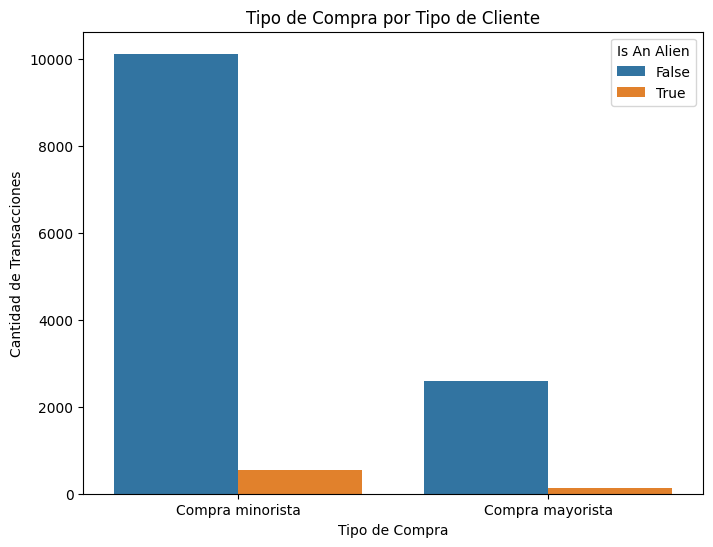

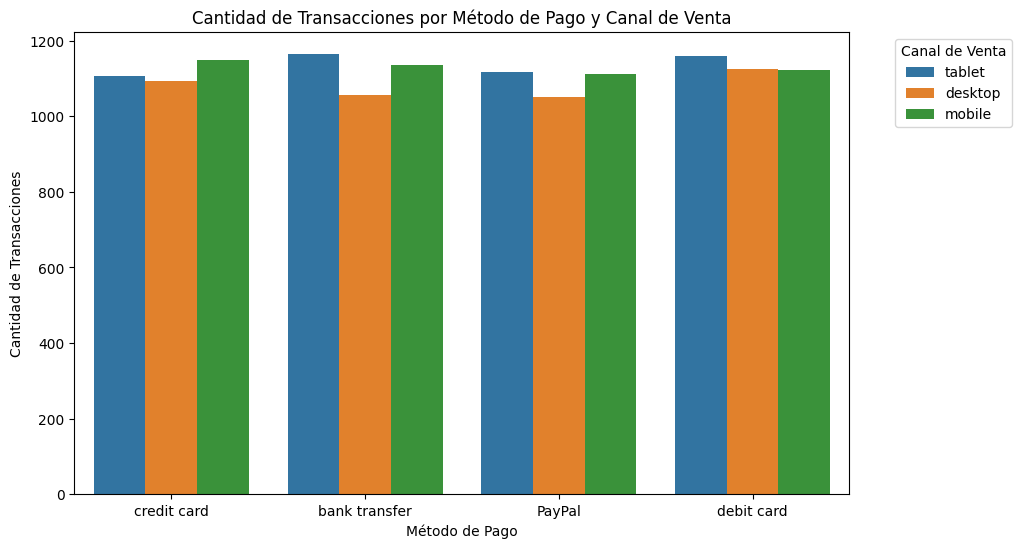

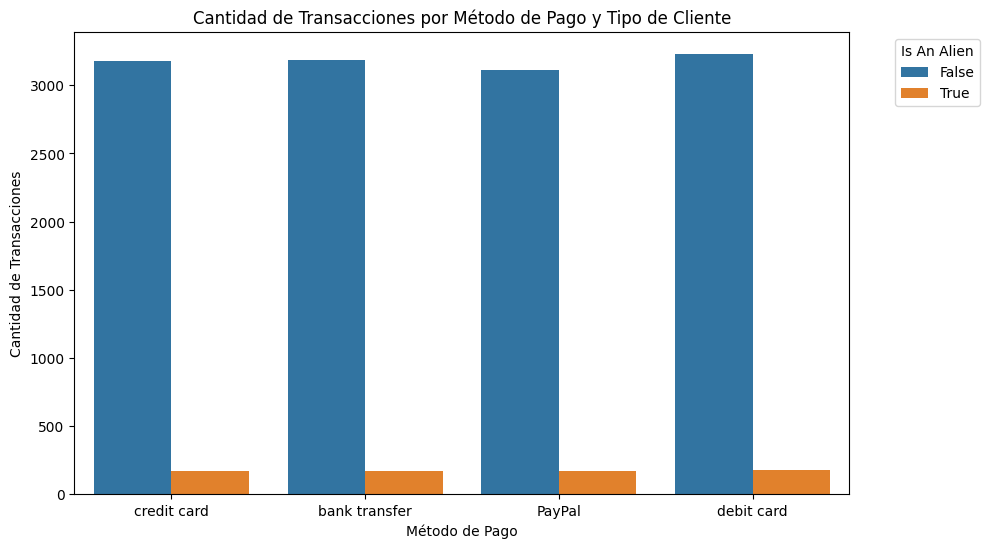

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

print('2.- Visualización de Variables Categóricas')

# Gráfico de barras: tipo de compra por tipo de cliente
plt.figure(figsize=(8, 6))
sns.countplot(data=df_pandas, x='Type of purchase', hue='Is An Alien')
plt.title('Tipo de Compra por Tipo de Cliente')
plt.xlabel('Tipo de Compra')
plt.ylabel('Cantidad de Transacciones')
plt.legend(title='Is An Alien')
plt.show()

# Gráfico de barras: cantidad de transacciones por método de pago y canal de venta
plt.figure(figsize=(10, 6))
sns.countplot(data=df_pandas, x='Payment Method', hue='Device Used')
plt.title('Cantidad de Transacciones por Método de Pago y Canal de Venta')
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad de Transacciones')
plt.legend(title='Canal de Venta', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Gráfico de barras: cantidad de transacciones por método de pago y tipo de cliente
plt.figure(figsize=(10, 6))
sns.countplot(data=df_pandas, x='Payment Method', hue='Is An Alien')
plt.title('Cantidad de Transacciones por Método de Pago y Tipo de Cliente')
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad de Transacciones')
plt.legend(title='Is An Alien', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()




1. El primer gráfico es simplemente un conteo de transacciones para compras minoristas y compras mayoristar por tipo de cliente (si es alien o no). Se ve claramente que la mayoría de transacciones se trataron de compras minoristas, tanto para aliens como humanos.
2. El segundo grafico  de barras nos muestra la cantidad de transacciones
por metodo de pagos diferenciados por el canal de venta. La distribucion es bastante uniforme para cada metodo de pago pero se puede señalar que el canal de venta mayoritario para metodos de pago de tarjeta de debito y transferencias son tablets,  mientras que para tarjetas de credito, son mobiles.

3. El último gráfico refleja la cantidad de transacciones realizadas con distintos métodos de pago para cada tipo de cliente. Podemos ver que no hay un tipo de transacción particularmente destacable por sobre las otras al igual que en el grafico anterior y que tanto aliens como humanos se distribuyen de igual manera al elegir el tipo de transacción.



3.- Visualización de Variables Numéricas


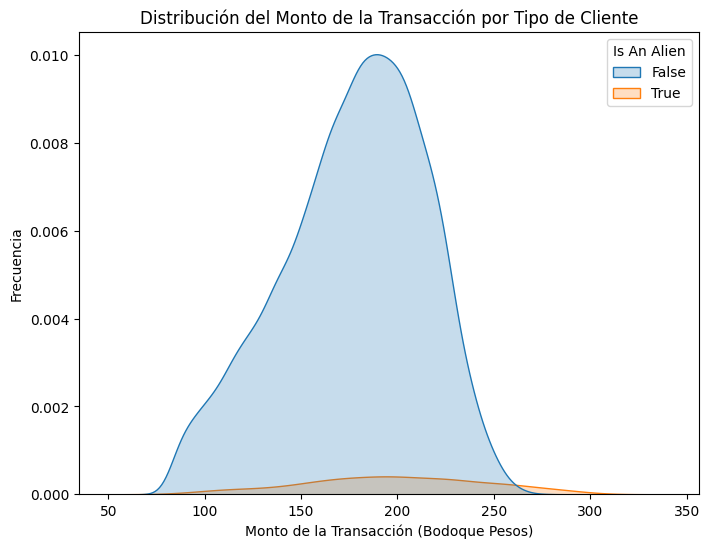

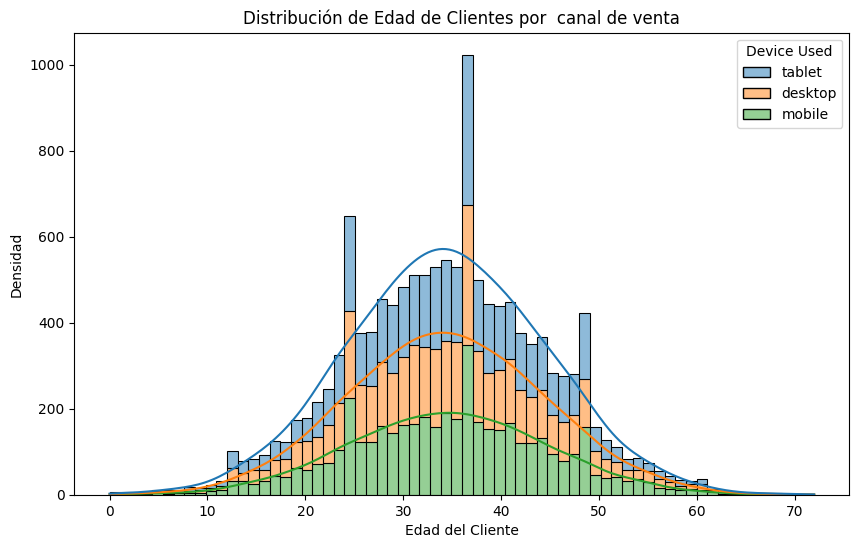

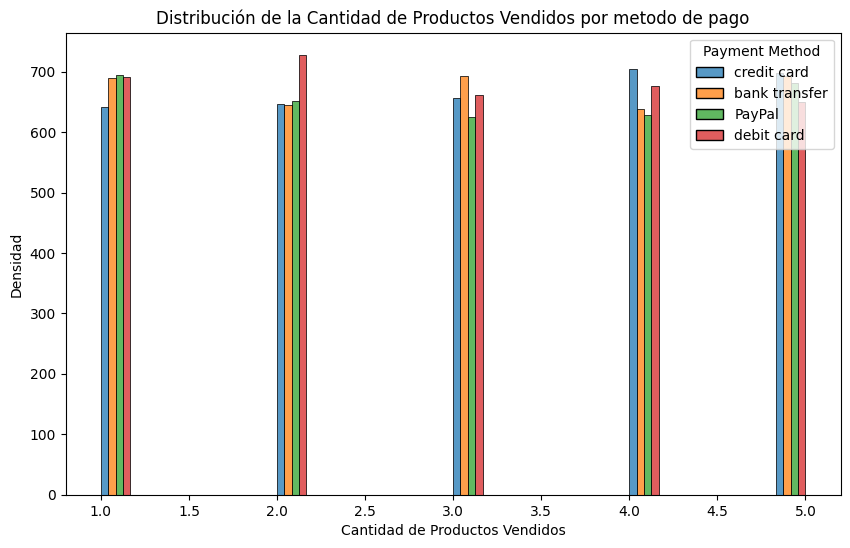

In [ ]:
print('3.- Visualización de Variables Numéricas')

# Distplot para el monto de la transacción por tipo de cliente
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df_pandas, x='Transaction bp', hue='Is An Alien', fill=True)
plt.title('Distribución del Monto de la Transacción por Tipo de Cliente')
plt.xlabel('Monto de la Transacción (Bodoque Pesos)')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de distribución: edad de clientes por canal de venta
plt.figure(figsize=(10, 6))
sns.histplot(data=df_pandas, x='Customer Age', hue='Device Used',kde=True, multiple="stack" )
plt.title('Distribución de Edad de Clientes por  canal de venta')
plt.xlabel('Edad del Cliente')
plt.ylabel('Densidad')
plt.show()


# Gráfico de distribución: cantidad de productos vendidos por metodo de pago
plt.figure(figsize=(10, 6))
sns.histplot(data=df_pandas, x='Quantity', hue='Payment Method', kde=False, multiple="dodge")
plt.title('Distribución de la Cantidad de Productos Vendidos por metodo de pago')
plt.xlabel('Cantidad de Productos Vendidos')
plt.ylabel('Densidad')
plt.show()




1. El primer gráfico nos muestra las distribuciones de los montos de transacción por tipo de cliente. Se puede observar que la distribución de los humanos es muy similar a una normal, mientras que la distribución de los alienigenas es mucho más uniforme.
2. En el gráfico 2 podemos ver la distribución de las edades de los clientes por cada tipo de aparato utilizado (notebook, tablet y celular) estando stackeadas (una encima de la otra). Se ve que las tres distribuciones son muy similares entre sí, similares a una normal, exceptuando los 3 bienes donde las distribuciones tienen un peak considerable. Esto indica que hay un gran número de clientes de edades de aproximadamente 23-25, 36-39 y 47-48.

3. En el tercer gráfico podemos ver la cantidad de productos vendidos por método de pago. En general, por cada posible cantidad, los métodos de pago son bastante uniformes. La tarjeta de débito parece ser la preferida para compras pequeñas (1 y 2) y la tarjeta de crédito para compras más grandes (4 y 5). Las transferencias parecen variar, aunque dominan las transacciones de 3 productos, y PayPal es popular para las compras de 1 producto como de 5 productos.


4.- Análisis de Patrones en Transacciones


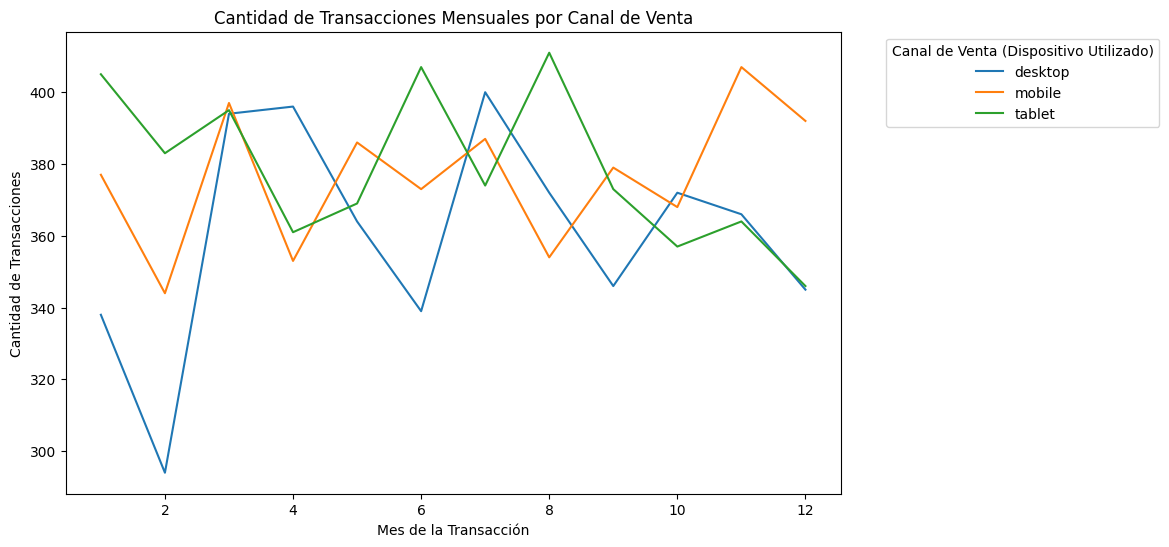

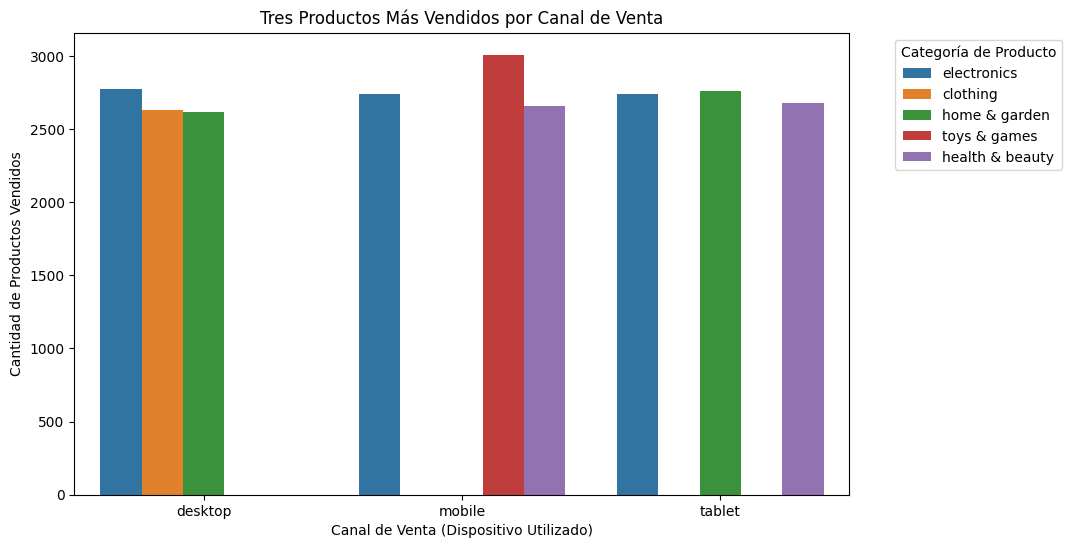

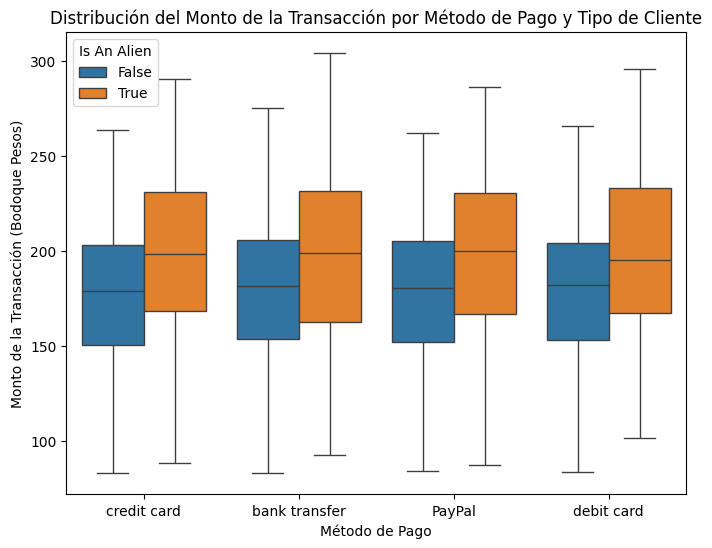

In [ ]:
print('4.- Análisis de Patrones en Transacciones')


# Agrupar por 'Transaction Month' y 'Device Used' para contar la cantidad de transacciones
monthly_transactions_by_channel = df_pandas.groupby(['Transaction Month', 'Device Used']).size().reset_index(name='Transaction Count')

# Gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_transactions_by_channel, x='Transaction Month', y='Transaction Count', hue='Device Used')
plt.title('Cantidad de Transacciones Mensuales por Canal de Venta')
plt.xlabel('Mes de la Transacción')
plt.ylabel('Cantidad de Transacciones')
plt.legend(title='Canal de Venta (Dispositivo Utilizado)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Agrupar por 'Product Category' y 'Device Used', sumando las ventas
top_products_per_channel = df_pandas.groupby(['Device Used', 'Product Category'])['Quantity'].sum().reset_index()

# Ordenar por cantidad de ventas y tomar los tres productos más vendidos por canal
top_products_per_channel = top_products_per_channel.sort_values(['Device Used', 'Quantity'], ascending=[True, False]).groupby('Device Used').head(3)

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=top_products_per_channel, x='Device Used', y='Quantity', hue='Product Category')
plt.title('Tres Productos Más Vendidos por Canal de Venta')
plt.xlabel('Canal de Venta (Dispositivo Utilizado)')
plt.ylabel('Cantidad de Productos Vendidos')
plt.legend(title='Categoría de Producto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Gráfico de caja: distribución de monto de la transacción por método de pago
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_pandas, x='Payment Method', y='Transaction bp', hue='Is An Alien')
plt.title('Distribución del Monto de la Transacción por Método de Pago y Tipo de Cliente')
plt.xlabel('Método de Pago')
plt.ylabel('Monto de la Transacción (Bodoque Pesos)')
plt.legend(title='Is An Alien')
plt.show()






1. El primer gráfico nos presenta la cantidad de transacciones por mes para
Cada canal de venta. A simple vista, no parece haber una relación entre los comportamientos de cada a lo largo del año, pero los primeros dos meses todos siguen el mismo patrón (bajada -> subida) y del mes 11 al 12 todas las transacciones bajan.

2. El segundo gráfico muestra los 3 productos más vendidos por canal de
Venta. Los productos electrónicos son populares en todos los canales de venta, mientras que los productos de salud y belleza son más populares en usuarios que utilizan celulares y tabletas, así como los productos de hogar y jardín son más populares en usuarios que utilizan computadoras o tabletas. Además, los productos de jugos y jugetes son altamente populares en usuarios de móviles y los productos de vestimenta son más vendidos por usuarios utilizando sus computadoras.

3. El tercer gráfico muestra las distribuciones de los montos de transacción por tipo de cliente (alien o humano) usando boxplots. Es curioso ver que los numeros de montos mas grandes para todos los estadisticos (media, mediana, maximo) son para los aliens. Por lo que, aunque la mayoría de transacciones son realizadas por humanos (por como vimos en el gráfico de distribución de la parte anterior), las transacciones con los montos más altos son realizadas por aliens (también se apreciaba en el gráfico de distribución).



### 5. Particiones y consultas en SQL [2 puntos]

<center>
<img src="https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/misc_images/1696330143457.gif" width=400 />

El equipo de Bodoque e-shop ha solicitado que los datos estén disponibles en una tabla SQL consultable. Además, están interesados en aprovechar las funciones de ventana en SQL para análisis avanzados. Las funciones de ventana permiten realizar cálculos sobre un conjunto de filas que están relacionadas con la fila actual. Por ejemplo, UNBOUNDED PRECEDING se usa para indicar que el rango de la función de ventana comienza desde la primera fila de la partición o del conjunto de resultados, lo cual es útil para calcular sumas acumulativas hasta la fila actual. Las variaciones comunes de este uso incluyen:

- `UNBOUNDED PRECEDING` to `CURRENT ROW`: Calcula desde el inicio de la partición hasta la fila actual.
- `UNBOUNDED PRECEDING` to `UNBOUNDED FOLLOWING`: Cubre todas las filas dentro de la partición.
- `VALUE PRECEDING` to `VALUE FOLLOWING`: Establece un rango específico basado en valores antes y después de la fila actual.

<center>
<img src="https://learnsql.com/blog/sql-window-functions-rows-clause/1.png" width=500 />

Ejemplo de uso en SQL:

```sql
STAT(COL1_NAME) OVER (PARTITION BY COL2_NAME ORDER BY COL3_NAME ROWS BETWEEN X PRECEDING AND CURRENT ROW)
```


Responda y realice los siguientes puntos:

1. **Creación de Tabla con PySpark** (2 puntos):
   - Desarrolle un script utilizando PySpark para crear una tabla a partir de un DataFrame previamente transformado. Seleccione y utilice una variable específica para la partición de la tabla. Justifique su elección de esta variable considerando factores como el tamaño del DataFrame, la distribución de los datos y el impacto potencial en el rendimiento de futuras consultas.

2. **Consulta SQL para Principales Clientes** (Bonus: 2 punto):
   - Ejecute una consulta SQL para identificar los 10 clientes que más productos han comprado. La consulta debe retornar el ID del cliente junto con el total de productos comprados, ordenados en forma descendente.

3. **Implementación de Función de Ventana en SQL y Equivalente en Spark** (Bonus: 2 punto):
   - Implemente una función de ventana en SQL para calcular la compra más alta realizada por cada usuario en los últimos tres meses. Además, describa cómo se podría realizar una función equivalente en Spark, considerando las capacidades específicas de PySpark para manejar este tipo de consultas.



In [ ]:
# Código Aquí

# 1.
# Se selecciona la variable 'Product Category' asi Bodoque en un futuro puede revisar cómo van las ventas de
# sus distintas categorías de productos. En el futuro puede conocer cómo han ido las ventas durante el año,
# qué tipo de cliente tiene cada una de las categorías, entre otras cosas.
(
    df.write.partitionBy("Product Category")
    .format("parquet")
    .save("./parquets/bodoque_info/")
)

In [ ]:
df_load = sparksession.read.parquet("./parquets/bodoque_info/")
df_load.show(2)

# Se crea una vista temporal
df_load.createOrReplaceTempView("sql_bodoque")

+--------------------+--------------------+------------------+-------------------+--------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Quantity|Customer Age|Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|    Transaction bp|Transaction Month|Type of purchase|Product Category|
+--------------------+--------------------+------------------+-------------------+--------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+----------------+
|416dbe38-0a22-419...|691

In [ ]:
# 2.
sparksession.sql("""
SELECT `Customer ID`, SUM(`Quantity`) as `Cantidad Productos`
FROM sql_bodoque
GROUP BY `Customer ID`
ORDER BY `Cantidad Productos` DESC
LIMIT 5
""").show()

+--------------------+------------------+
|         Customer ID|Cantidad Productos|
+--------------------+------------------+
|a76f00f5-8493-41b...|                 5|
|aa8c72f5-fbcc-4bf...|                 5|
|447b6447-464c-400...|                 5|
|ddb1eedb-78a7-403...|                 5|
|1718476e-0518-41b...|                 5|
+--------------------+------------------+



In [ ]:
# 3.1
# Función de Ventana en SQL
sparksession.sql("""
SELECT *
FROM (
  SELECT `Customer ID`, `Transaction Date`, `Transaction Amount`,
      RANK() OVER (PARTITION BY `Customer ID` ORDER BY `Transaction Amount` DESC) AS TOP_COMPRA
  FROM sql_bodoque
  WHERE `Transaction Date` >= CURRENT_DATE - INTERVAL '3 months'
)
WHERE TOP_COMPRA = 1
""").show()

+--------------------+-------------------+------------------+----------+
|         Customer ID|   Transaction Date|Transaction Amount|TOP_COMPRA|
+--------------------+-------------------+------------------+----------+
|0084aeb6-6bc7-4f8...|2024-11-20 00:00:00|            265.09|         1|
|00dba4f3-102b-4d8...|2024-08-02 00:00:00|             80.76|         1|
|011ba8d6-6dcd-4cf...|2024-10-20 00:00:00|            218.64|         1|
|014817a0-2f4f-477...|2024-12-17 00:00:00|            289.72|         1|
|014da57c-a59c-465...|2024-08-21 00:00:00|             33.22|         1|
|01754c8a-c873-49e...|2024-12-05 00:00:00|            267.89|         1|
|0178fe5b-e055-4ec...|2024-06-15 00:00:00|            723.04|         1|
|01ac1427-4acc-410...|2024-06-15 00:00:00|            234.43|         1|
|01feca2f-2907-445...|2024-10-17 00:00:00|             48.71|         1|
|03557036-602b-4f5...|2024-12-17 00:00:00|              29.8|         1|
|03c61a84-77db-4aa...|2024-08-29 00:00:00|         

In [ ]:
# 3.2
# Función equivalente en Spark:
from pyspark.sql.functions import col, rank, current_date, date_sub
from pyspark.sql.window import Window

rango = date_sub(current_date(), 90)
particion = Window.partitionBy("Customer ID").orderBy(col("Transaction Amount").desc())

resultado = (
            df.filter(col("Transaction Date") >= rango)
            .withColumn("TOP_COMPRA", rank()
            .over(particion)).filter(col("TOP_COMPRA") == 1)
            .select("Customer ID", "Transaction Date", "Transaction Amount","TOP_COMPRA")
            )

resultado.show()

+--------------------+-------------------+------------------+----------+
|         Customer ID|   Transaction Date|Transaction Amount|TOP_COMPRA|
+--------------------+-------------------+------------------+----------+
|0084aeb6-6bc7-4f8...|2024-11-20 00:00:00|            265.09|         1|
|00dba4f3-102b-4d8...|2024-08-02 00:00:00|             80.76|         1|
|011ba8d6-6dcd-4cf...|2024-10-20 00:00:00|            218.64|         1|
|014817a0-2f4f-477...|2024-12-17 00:00:00|            289.72|         1|
|014da57c-a59c-465...|2024-08-21 00:00:00|             33.22|         1|
|01754c8a-c873-49e...|2024-12-05 00:00:00|            267.89|         1|
|0178fe5b-e055-4ec...|2024-06-15 00:00:00|            723.04|         1|
|01ac1427-4acc-410...|2024-06-15 00:00:00|            234.43|         1|
|01feca2f-2907-445...|2024-10-17 00:00:00|             48.71|         1|
|03557036-602b-4f5...|2024-12-17 00:00:00|              29.8|         1|
|03c61a84-77db-4aa...|2024-08-29 00:00:00|         

### 6. UDF [12 puntos]

<center>
<img src="https://64.media.tumblr.com/ba8c705edd2bed0a28d9458811155d69/tumblr_pap19zg4ae1w3zg6go1_400.gifv" width=400 />



Un experto en predicciones y programación le ha proporcionado un objeto serializado (`pickle`) diseñado para calcular las probabilidades de que un cliente cometa o no un fraude. Este experto sugiere que, para maximizar las capacidades de procesamiento distribuido de Spark, debería implementar `Scalar User Defined Functions` (udf). Esto le permitirá aplicar el objeto serializado en un entorno distribuido a lo largo de toda la población de datos. Un aspecto clave de la función desarrollada por el experto es que se enfoca exclusivamente en las siguientes columnas para realizar las predicciones: `['Transaction Amount', 'Quantity', 'Customer Age', 'Transaction Hour']`.

Aparte, el experto le proporciona las siguientes instrucciones para usar las UDF en Spark:

```python
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

def custom_function(col1, col2, col3, col4):
    pass

udf_function = udf(custom_function, FloatType())
```

Basándose en la estructura proporcionada, debe desarrollar una función que ejecute un código específico. Tenga en cuenta que esta función solo puede recibir columnas de Spark y debe retornar el valor deseado. Posteriormente, deberá utilizar esta función UDF indicando la función personalizada y el formato de salida.

Siga los siguientes pasos para implementar la solución y responda las preguntas:

1. **Cargar el objeto serializado**: Revise el tipo de objeto y deduzca su función. (1 punto)
2. **Explorar el objeto**: Utilice las funciones `dir` y `help` para identificar qué método del objeto predice la probabilidad. (1 punto)
3. **Crear una función personalizada**: Elabore una función que prediga la probabilidad de fraude utilizando el último valor de la lista generada por el objeto serializado. Puede modificar el nombre de la función para reflejar su propósito. (6 puntos)
4. **Definir la función UDF**: Establezca la función UDF con la función personalizada que ha creado. (2 punto)
5. **Generar una nueva columna**: Añada una nueva columna `prediction` a su DataFrame en Spark utilizando la función UDF y muestre un ejemplo de cómo se aplica. ¿Qué beneficios podría generar utilizar udf? (2 puntos)

In [ ]:
# Código Aquí

#1
import pickle

# Cargar el objeto serializado
with open('object.pkl', 'rb') as file: # Cambiar con la ruta propia
    fraud_model = pickle.load(file)

# Revisar el tipo del objeto
print(type(fraud_model))


<class 'sklearn.linear_model._logistic.LogisticRegression'>


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.2.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [ ]:
#2
# Explorar el objeto con dir
print(dir(fraud_model))
print(' ')

# Obtener ayuda sobre el objeto para identificar sus métodos
help(fraud_model) # Vemos que corresponde a un modelo de regresion logistica implementado con sklearn.

['C', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__str__', '__subclasshook__', '__weakref__', '_build_request_for_signature', '_check_feature_names', '_check_n_features', '_estimator_type', '_get_default_requests', '_get_metadata_request', '_get_param_names', '_get_tags', '_more_tags', '_parameter_constraints', '_predict_proba_lr', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', '_validate_params', 'class_weight', 'classes_', 'coef_', 'decision_function', 'densify', 'dual', 'feature_names_in_', 'fit', 'fit_intercept', 'get_metadata_routing', 'get_params', 'intercept_', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_feature

In [ ]:
#3
def predict_fraud_proba(transaction_amount, quantity, customer_age, transaction_hour):
    """
    Esta función toma como entrada cuatro columnas relevantes ('Transaction Amount', 'Quantity',
    'Customer Age', 'Transaction Hour') y utiliza un modelo de regresión logistica previamente cargado
    para predecir la probabilidad de que una transaccion sea fraudulenta.

    Retorna la probabilidad de fraude (la clase 1 en el modelo).
    """
    # Convertir los valores de entrada en una matriz de características
    features = [[transaction_amount, quantity, customer_age, transaction_hour]]

    # Usar el método predict_proba para obtener las probabilidades
    proba = fraud_model.predict_proba(features)

    # Retornar la probabilidad de la clase 1 (fraude)
    return float(proba[0][1])


In [ ]:
#4
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

# Definir la UDF utilizando la función predict_fraud
fraud_udf = udf(predict_fraud_proba, FloatType())


In [ ]:
#5
# Aplicar la UDF para crear una nueva columna 'prediction' en el DataFrame
df_with_prediction = df.withColumn('prediction', fraud_udf(df['Transaction Amount'], df['Quantity'], df['Customer Age'], df['Transaction Hour']))

# Mostrar algunas filas para verificar
df_with_prediction.show(10)

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+--------------------+-----------+--------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+-----------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|   Customer Location|Device Used|    IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|    Transaction bp|Transaction Month|Type of purchase| prediction|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+--------------------+-----------+--------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+-------------

El uso de UDF en Pyspark permite ejecutar funciones personalizadas, como al prediccion de fraude en este caso, las cuales se pueden ejecutar sobre grandes volúmenes de datos en un entorno distribuido, lo que mejora el rendimiento al procesar datos masivos.

Ademas, las UDF permiten realizar cálculos personalizados sin necesidad de mover los datos fuera de Spark, maximizando el uso de los recursos del clúster.Asi como tambien aplicar modelos previamente entrenados (como este de regresion logistica de scikit-learn) a los datos distribuidos.